In [55]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('Preprocessed Engine Data.csv')
df

,Coolant temp,Fuel pressure,LOG(Engine rpm),LOG(Lub oil pressure),LOG(Coolant pressure),lub oil temp,Engine Condition
0,82.445724,16.193866,6.775366,1.078956,0.901990,77.640934,0
1,79.645777,6.553147,6.253829,1.085779,0.062361,77.752266,1
2,71.774629,19.510172,6.159095,1.310448,1.315726,74.129907,1
3,87.000225,15.738871,6.428105,1.735704,0.718937,78.396989,0
4,75.669818,6.679231,7.107425,1.383597,0.794914,76.401152,0
...,...,...,...,...,...,...,...
16384,87.925087,4.981360,6.804615,1.415197,1.469386,75.951627,1
16385,74.928459,10.866701,6.542472,1.572301,1.822400,75.281430,1
16386,86.337345,4.927376,6.527958,0.983330,0.643732,76.844940,1
16387,73.624396,8.291816,6.545350,1.129518,0.200267,77.179693,1


In [58]:
df.shape

(16389, 7)

In [59]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [60]:
X.head()

,Coolant temp,Fuel pressure,LOG(Engine rpm),LOG(Lub oil pressure),LOG(Coolant pressure),lub oil temp
0,82.445724,16.193866,6.775366,1.078956,0.901990,77.640934
1,79.645777,6.553147,6.253829,1.085779,0.062361,77.752266
2,71.774629,19.510172,6.159095,1.310448,1.315726,74.129907
3,87.000225,15.738871,6.428105,1.735704,0.718937,78.396989
4,75.669818,6.679231,7.107425,1.383597,0.794914,76.401152


In [61]:
columns = X.columns
columns

Index(['Coolant temp', 'Fuel pressure', 'LOG(Engine rpm)',
       'LOG(Lub oil pressure)', 'LOG(Coolant pressure)', 'lub oil temp'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = scale.fit_transform(X)

In [63]:
X

array([[ 0.6675031 ,  3.46121742,  0.48971912, -0.1500906 ,  0.32099964,
         0.86180427],
       [ 0.21634279, -0.03967712, -1.09632899, -0.13288061, -1.50535384,
         0.94275269],
       [-1.05194854,  4.66548843, -1.38442301,  0.43380141,  1.22095283,
        -1.69103884],
       ...,
       [ 1.29456651, -0.63005357, -0.2626744 , -0.39128593, -0.24076125,
         0.28304224],
       [-0.75389249,  0.59169651, -0.20978433, -0.02255864, -1.2053828 ,
         0.52643906],
       [ 0.34132374, -0.98044207, -1.19137117,  0.47924675, -0.09164268,
        -0.64809276]])

In [64]:
X = pd.DataFrame(X,columns = columns)
X

,Coolant temp,Fuel pressure,LOG(Engine rpm),LOG(Lub oil pressure),LOG(Coolant pressure),lub oil temp
0,0.667503,3.461217,0.489719,-0.150091,0.321000,0.861804
1,0.216343,-0.039677,-1.096329,-0.132881,-1.505354,0.942753
2,-1.051949,4.665488,-1.384423,0.433801,1.220953,-1.691039
3,1.401378,3.295993,-0.566336,1.506421,-0.077175,1.411526
4,-0.424310,0.006108,1.499546,0.618305,0.088088,-0.039633
...,...,...,...,...,...,...
16384,1.550402,-0.610450,0.578667,0.698008,1.555192,-0.366479
16385,-0.543767,1.526731,-0.218536,1.094271,2.323066,-0.853775
16386,1.294567,-0.630054,-0.262674,-0.391286,-0.240761,0.283042
16387,-0.753892,0.591697,-0.209784,-0.022559,-1.205383,0.526439


In [65]:
import seaborn as sns

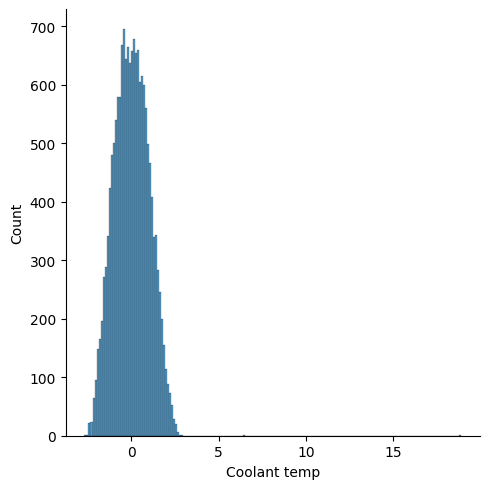

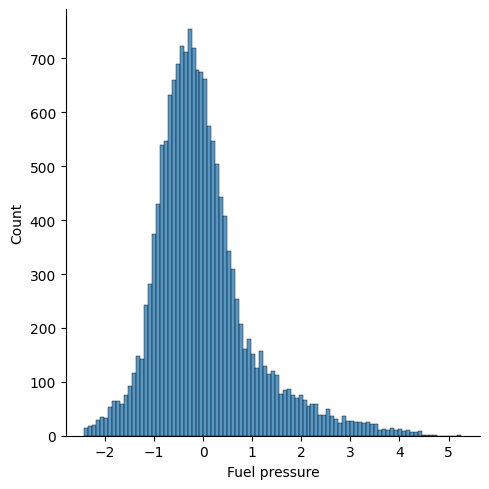

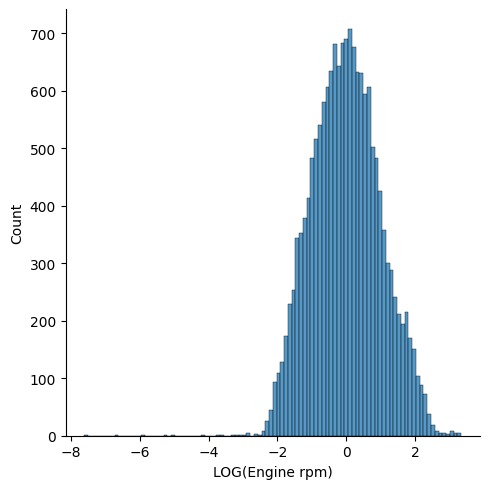

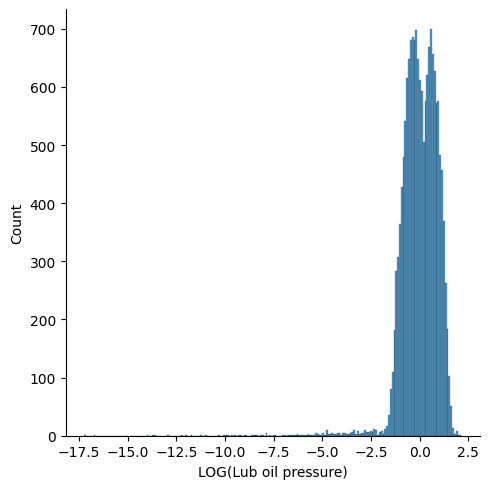

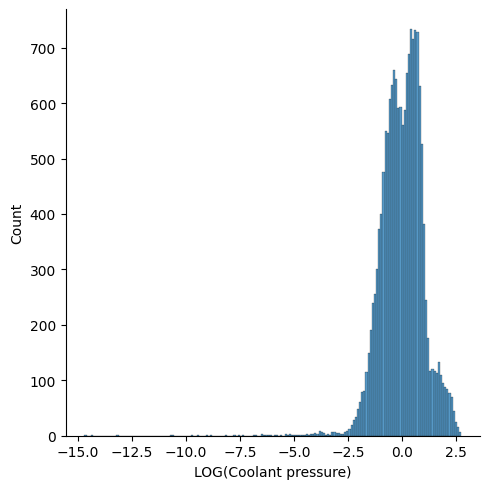

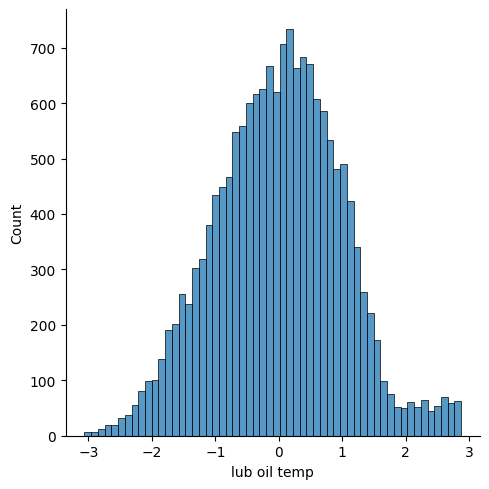

In [66]:
for key in X.columns :
    sns.displot(X[key])

In [67]:
vif = pd.DataFrame()
vif['features'] = X.columns

In [68]:
vif

,features
0,Coolant temp
1,Fuel pressure
2,LOG(Engine rpm)
3,LOG(Lub oil pressure)
4,LOG(Coolant pressure)
5,lub oil temp


In [69]:
X.shape

(16389, 6)

In [70]:
vif['Variance Inflation Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [71]:
vif

,features,Variance Inflation Factor
0,Coolant temp,1.012602
1,Fuel pressure,1.006618
2,LOG(Engine rpm),1.005451
3,LOG(Lub oil pressure),1.005486
4,LOG(Coolant pressure),1.005077
5,lub oil temp,1.011614


In [72]:
# NOW WE ARE GOING TO CHECK THE ACCURACIES OF VARIOUS CLASSIFICATION MODELS 


# CONVENTIONAL MACHINE LEARNING METHODS 

# 1) LOGISTIC REGRESSION
# 2) NAIVE BAYES CLASSIFIER
# 3) KNN 
# 4) SUPPORT VECTOR MACHINE 

In [73]:
import numpy as np
X = np.array(X)

In [74]:
X

array([[ 0.6675031 ,  3.46121742,  0.48971912, -0.1500906 ,  0.32099964,
         0.86180427],
       [ 0.21634279, -0.03967712, -1.09632899, -0.13288061, -1.50535384,
         0.94275269],
       [-1.05194854,  4.66548843, -1.38442301,  0.43380141,  1.22095283,
        -1.69103884],
       ...,
       [ 1.29456651, -0.63005357, -0.2626744 , -0.39128593, -0.24076125,
         0.28304224],
       [-0.75389249,  0.59169651, -0.20978433, -0.02255864, -1.2053828 ,
         0.52643906],
       [ 0.34132374, -0.98044207, -1.19137117,  0.47924675, -0.09164268,
        -0.64809276]])

In [75]:
y

0        0
1        1
2        1
3        0
4        0
        ..
16384    1
16385    1
16386    1
16387    1
16388    1
Name: Engine Condition, Length: 16389, dtype: int64

In [76]:
print(X.shape)
print(y.shape)

(16389, 6)
(16389,)


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13111, 6)
(3278, 6)
(13111,)
(3278,)


ACCURACY OF RBF KERNEL - SVM:  0.6665649786455156


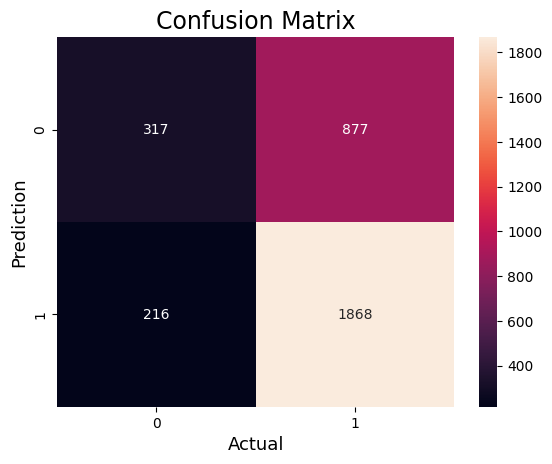

In [79]:
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


rbf_kernel = SVC(kernel = 'rbf')
rbf_kernel.fit(X_train,y_train)

y_pred = rbf_kernel.predict(X_test)
print("ACCURACY OF RBF KERNEL - SVM: ",metrics.accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot = True,
            fmt = 'g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


ACCURACY OF LINEAR KERNEL - SVM:  0.6357535082367297


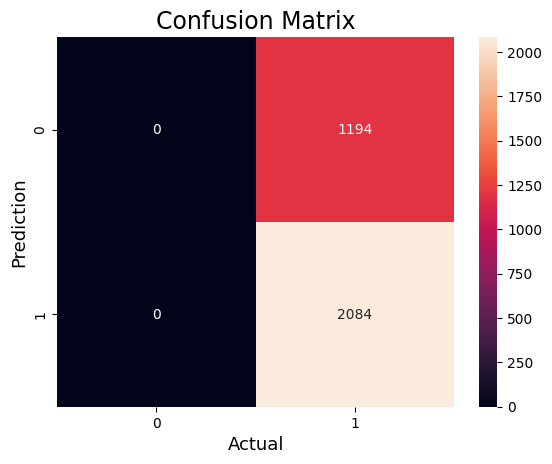

In [80]:
from sklearn.svm import SVC
from sklearn import metrics 

rbf_kernel = SVC(kernel = 'linear',random_state = 0)
rbf_kernel.fit(X_train,y_train)

y_pred = rbf_kernel.predict(X_test)
print("ACCURACY OF LINEAR KERNEL - SVM: ",metrics.accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot = True,
            fmt = 'g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(X_train,y_train)

y_pred = lr_classifier.predict(X_test)
print('ACCURACY OF LOGISTIC REGRESSION :',metrics.accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)
print('ACCURACY OF NAIVE BAYES CLASSIFIER :',metrics.accuracy_score(y_test,y_pred))